In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [9]:
df_majority = df[df['Exited'] ==0]
df_minority = df[df['Exited'] ==1]
from sklearn.utils import resample

df_majority_downsampled = resample(df_majority, n_samples= len(df_minority), replace=False)
df = pd.concat([df_minority, df_majority_downsampled])

In [10]:
df = df.sample(frac = 1).reset_index(drop = True)

In [11]:
df.Exited.value_counts()

Exited
0    2037
1    2037
Name: count, dtype: int64

In [12]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,5395,15668853,Menhennitt,637,Spain,Female,44,0,157622.58,1,1,1,120454.20,0
1,1016,15686936,McGregor,676,France,Female,37,5,89634.69,1,1,1,169583.18,1
2,4091,15681220,Chou,503,France,Female,37,8,0.00,2,1,1,97893.32,0
3,7572,15768342,Bolton,718,France,Male,52,8,79475.30,3,1,1,32421.32,1
4,1762,15796313,Olsen,662,France,Female,36,4,166909.20,2,1,0,138871.12,1


In [13]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis =1)

In [14]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,637,Spain,Female,44,0,157622.58,1,1,1,120454.20,0
1,676,France,Female,37,5,89634.69,1,1,1,169583.18,1
2,503,France,Female,37,8,0.00,2,1,1,97893.32,0
3,718,France,Male,52,8,79475.30,3,1,1,32421.32,1
4,662,France,Female,36,4,166909.20,2,1,0,138871.12,1


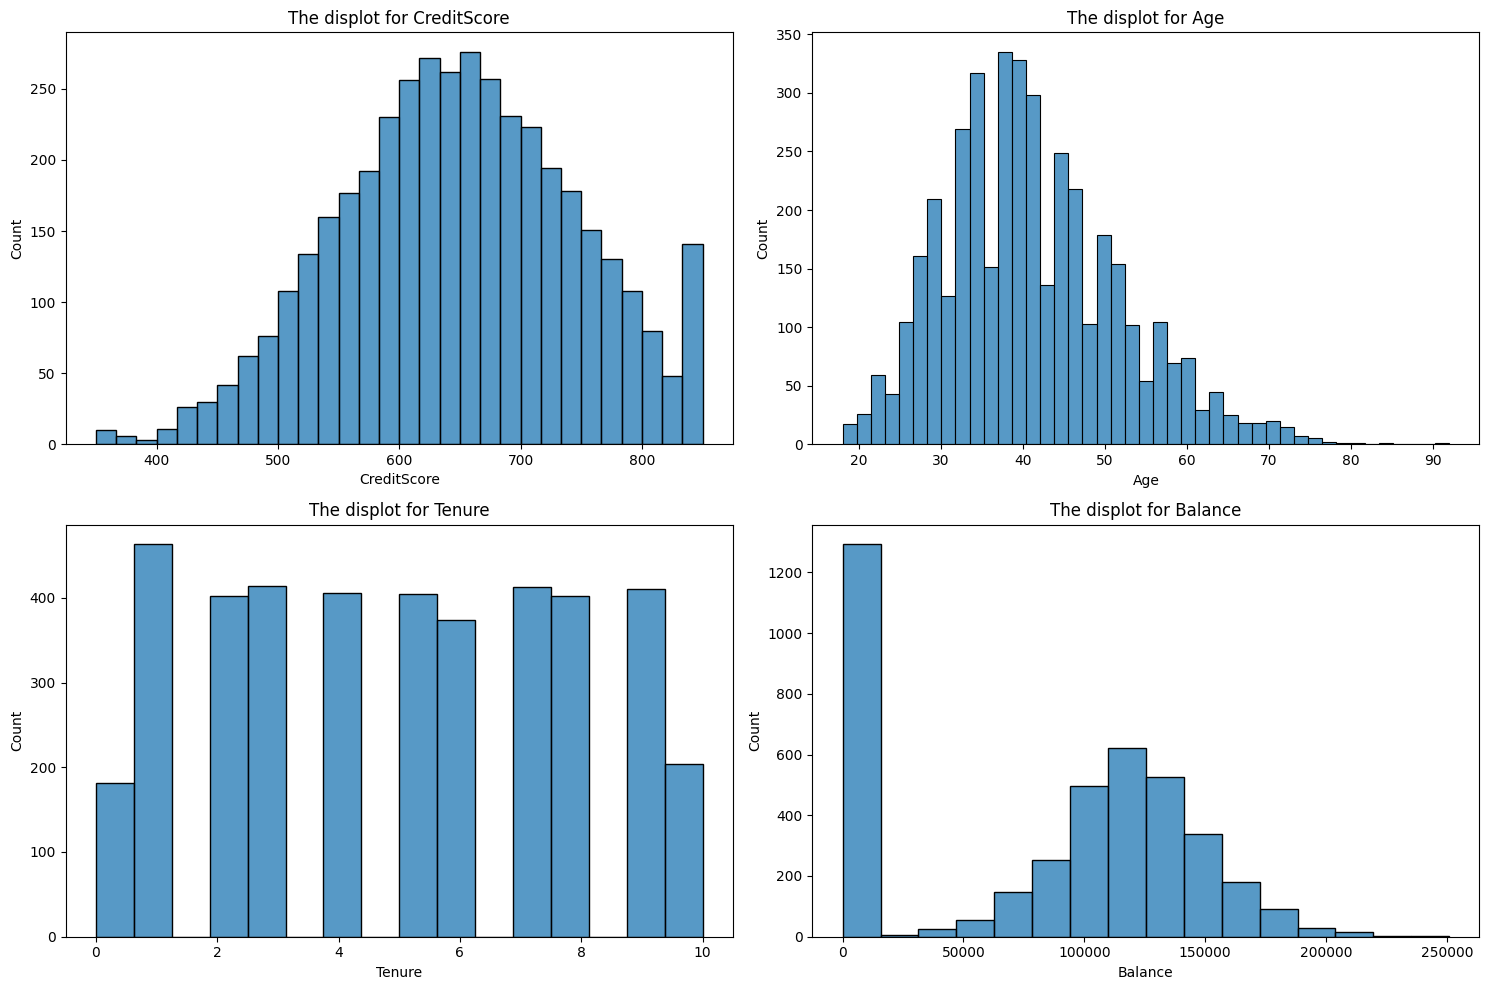

In [15]:
plt.figure(figsize=(15,10))
for i, column in enumerate(['CreditScore', 'Age', 'Tenure', 'Balance']):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[column])
    plt.title(f"The displot for {column}")

plt.tight_layout()


In [16]:
df.Exited.value_counts()

Exited
0    2037
1    2037
Name: count, dtype: int64

In [17]:
df.Geography.value_counts()

Geography
France     1905
Germany    1243
Spain       926
Name: count, dtype: int64

In [18]:
df.Gender.value_counts()

Gender
Male      2085
Female    1989
Name: count, dtype: int64

In [19]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,637,Spain,Female,44,0,157622.58,1,1,1,120454.20,0
1,676,France,Female,37,5,89634.69,1,1,1,169583.18,1
2,503,France,Female,37,8,0.00,2,1,1,97893.32,0
3,718,France,Male,52,8,79475.30,3,1,1,32421.32,1
4,662,France,Female,36,4,166909.20,2,1,0,138871.12,1


In [42]:
df.sample()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2251,695,Spain,Male,39,4,65521.2,1,1,1,1243.97,0


In [20]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [21]:
num_features = X.select_dtypes(exclude='object').columns
num_features

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [22]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,637,Spain,Female,44,0,157622.58,1,1,1,120454.20,0
1,676,France,Female,37,5,89634.69,1,1,1,169583.18,1
2,503,France,Female,37,8,0.00,2,1,1,97893.32,0
3,718,France,Male,52,8,79475.30,3,1,1,32421.32,1
4,662,France,Female,36,4,166909.20,2,1,0,138871.12,1


In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
transformer = ColumnTransformer([
    ('trf1' , OneHotEncoder(drop='first'), ['Geography', 'Gender']),
    ('trf2', StandardScaler(), num_features)

], remainder= 'passthrough')

In [24]:
X = transformer.fit_transform(X)

In [25]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,1.0,0.0,-0.118765,0.266842,-1.697017,1.218608,-0.755961,0.652665,1.082424,0.335272
1,0.0,0.0,0.0,0.279827,-0.387596,0.010984,0.115259,-0.755961,0.652665,1.082424,1.187798
2,0.0,0.0,0.0,-1.488286,-0.387596,1.035785,-1.339388,0.731139,0.652665,1.082424,-0.056222
3,0.0,0.0,1.0,0.709080,1.014771,1.035785,-0.049614,2.218239,0.652665,1.082424,-1.192345
4,0.0,0.0,0.0,0.136742,-0.481087,-0.330616,1.369317,0.731139,0.652665,-0.923852,0.654858
...,...,...,...,...,...,...,...,...,...,...,...
4069,0.0,0.0,1.0,0.024319,0.360333,-1.013817,1.352964,0.731139,0.652665,-0.923852,-1.354885
4070,1.0,0.0,0.0,0.126522,0.547315,-1.697017,0.437541,-0.755961,-1.532180,-0.923852,1.513004
4071,0.0,0.0,0.0,0.811283,2.604120,-1.355417,-1.339388,0.731139,0.652665,1.082424,0.532238
4072,0.0,1.0,1.0,0.913486,-0.574578,1.035785,0.726362,-0.755961,0.652665,-0.923852,-1.475885


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)

In [27]:
X_train.shape

(2851, 11)

In [28]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, TensorBoard
from keras.optimizers import Adam
import datetime

In [29]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape = (11,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\adpub\anaconda3\envs\my_ml_env\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(loss= 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
callbacks = EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001, 
    patience=2,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0,
)

In [33]:
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=50, callbacks= callbacks)

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5456 - loss: 0.6811 - val_accuracy: 0.7005 - val_loss: 0.5884
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7379 - loss: 0.5677 - val_accuracy: 0.7093 - val_loss: 0.5493
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7367 - loss: 0.5450 - val_accuracy: 0.7443 - val_loss: 0.5228
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7567 - loss: 0.5191 - val_accuracy: 0.7478 - val_loss: 0.5040
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7611 - loss: 0.4988 - val_accuracy: 0.7478 - val_loss: 0.4857
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7739 - loss: 0.4846 - val_accuracy: 0.7478 - val_loss: 0.4841
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7843 - loss: 0.4731 - val_accuracy: 0.7758 - val_loss: 0.4711
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7662 - loss: 0.4804 - val_accuracy: 0.7618 - val_loss:

In [34]:
y_prob = model.predict(X_test)

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [35]:
y_pred = np.where(y_prob > 0.5, 1, 0)

In [36]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, y_pred))

0.7833197056418643


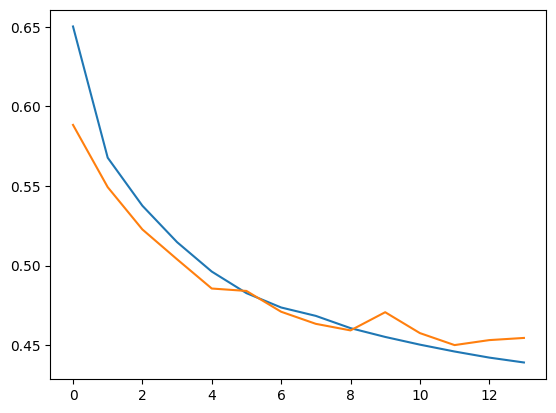

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

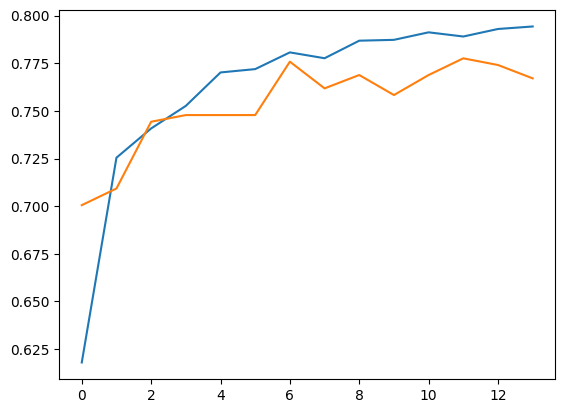

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [39]:
with open('transformer.pkl', 'wb') as file:
    pickle.dump(transformer, file)

In [40]:
model.save('model.h5')